+----------------+------------------+------------------+-------------------+------------------+
|         dataset|              cat1|              cat2|               cat3|             otros|
+----------------+------------------+------------------+-------------------+------------------+
|          arade4|49.759494925960446|20.770575015015016| 6.2806104003313665|23.189319658693165|
|    basel_temp_f| 73.69547333333334| 22.56998391666667|0.29134119833333333| 3.443201551666661|
|    basel_wind_f| 67.39094916666666|        24.5996075| 2.9850262499999998| 5.024417083333333|
|bird_migration_f|44.973576470588235|28.504147058823527| 13.051469411764705|13.470807058823539|
|       bitcoin_f|          68.70115|          7.519535|           1.025393|22.753922000000003|
+----------------+------------------+------------------+-------------------+------------------+
only showing top 5 rows



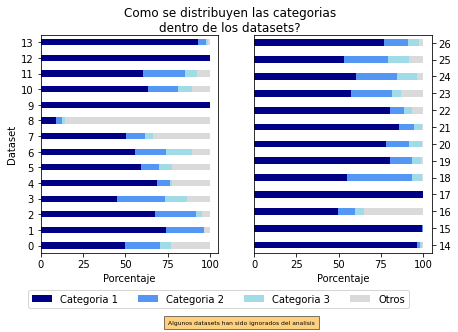

In [0]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

# Iniciar Spark Session
spark = SparkSession.builder.appName("DistribucionCategorias").getOrCreate()

# Cargar el archivo CSV en PySpark
df = spark.read.option("header", "true").csv('/FileStore/tables/datasets_top_4.csv', inferSchema=True)

# Mostrar las primeras filas
df.show(5)

# Convertir el DataFrame a pandas para facilitar la manipulación
df_pd = df.toPandas()

# Filtrar las dos secciones de datos
df1 = df_pd.iloc[:14, :]
df2 = df_pd.iloc[14:, :]

# Crear subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2)

# Establecer el tamaño de la figura
fig.set_size_inches(7, 4)

# Graficar el primer conjunto de datos (df1) en el primer subgráfico (ax1)
df1.plot.barh(
    stacked=True,
    ax=ax1,
    width=0.4,
    color={
        'cat1': '#000086',
        'cat2': '#5396f4',
        'cat3': '#a1dbe8',
        'otros': '#DADADA'
    }
)

# Graficar el segundo conjunto de datos (df2) en el segundo subgráfico (ax2)
df2.plot.barh(
    stacked=True,
    ax=ax2,
    width=0.4,
    color={
        'cat1': '#000086',
        'cat2': '#5396f4',
        'cat3': '#a1dbe8',
        'otros': '#DADADA'
    }
)

# Configurar etiquetas y leyendas
ax2.set_ylabel('')
ax1.set_ylabel('Dataset')

ax2.set_xlabel('Porcentaje')
ax1.set_xlabel('Porcentaje')

ax1.legend().remove()

ax2.legend(
    ['Categoria 1', 'Categoria 2', 'Categoria 3', 'Otros'],
    ncol=4,
    loc="upper left",
    bbox_to_anchor=(-1.3, -0.15)
)

ax2.yaxis.tick_right()

# Añadir texto en ax1
ax1.text(
    75, -5,
    "Algunos datasets han sido ignorados del analisis",
    fontsize=6,
    bbox={
        "facecolor": "orange",
        "alpha": 0.5
    }
)

# Título general de la figura
fig.suptitle('Como se distribuyen las categorias\ndentro de los datasets?')

# Mostrar la figura
plt.show()


Conversión a pandas: A pesar de estar trabajando con PySpark, utilizamos pandas para la parte de visualización, ya que PySpark no tiene funciones integradas para gráficos de barras apiladas horizontales (barh) o gráficos avanzados en general. El proceso de convertir de PySpark a pandas es eficiente cuando el conjunto de datos es relativamente pequeño para la visualización.